In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from math import log
from sklearn.model_selection import train_test_split

In [2]:
# load dataset and set features
iris = load_iris()
iris.keys()

features = iris['data']
target = iris['target']

feature_names = iris.feature_names
class_names = iris.target_names

print(feature_names)
print(class_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
# divide the dataset into two parts: training dataset and test dataset，the ration is 7:3
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=37)

In [4]:
# create a prepared dataset for further use
def iris_data():
  iris = iris = datasets.load_iris()
  features = iris['data']
  target = iris['target']
  return features, target

**Entropy Computation**

In [5]:
# calculate the entropy
def calEntropy(target):
  # create an empty dictionary
  label_counts={}  
  # write a loop to count the numbers of iris from differnent target label
  for count_target in target:
    current_label = count_target
    if current_label not in label_counts.keys():
      label_counts[current_label] = 0
    label_counts[current_label] += 1

 # calculate the entropy using the function: entropy = -sum P * (log2 P)
  entropy = 0
  for key in label_counts:
    prob = float(label_counts[key]/len(target))
    entropy -= prob * log(prob,2)
  return entropy

print('The entropy is :', calEntropy(target))  

The entropy is : 1.584962500721156


**Condition Entropy computation**

In [6]:
# Define the fuction of two-category condition entropy and divide the value of the attrbute(eg. petal_length) into two categories
# Calculate the condition entropy
def calConditionEntropy(feature_names,condition,target):
    
    true_condition = condition(feature_names)
    false_condition = condition(feature_names) ==False
    target_true = target[true_condition]
    target_false = target[false_condition]
    p_true = target_true.size / target.size
    p_false = 1 - p_true

    entropy = p_true * calEntropy(target_true) + p_false * calEntropy(target_false)
    return entropy


# test function set the feature attribute to petal length
petal_length = features[:,2]
test = calConditionEntropy(petal_length, lambda feature_names: feature_names < 5, target)
print('Condition entropy of petal length is: ',test)

Condition entropy of petal length is:  0.9528920327838427


**Split points Computation**

In [7]:
# Generates all boundaries points, sort the features and use the target changes as 
def splitFeaturePoint(feature, target):
    argsort = feature.argsort()
    f1 = feature[argsort]
    t1 = target[argsort]

    last_value = target[0]
    split_value = []

# Get all the boundary points
    for i in range(t1.size):
        if last_value != t1[i]:
            split_value.append((f1[i] + f1[i - 1]) / 2)
            last_value = t1[i]

    return np.array(split_value)


# Output
print(splitFeaturePoint(features[:,3],target))
print(splitFeaturePoint(features[:,1],target))
print(splitFeaturePoint(features[:,2],target))
print(splitFeaturePoint(features[:,0],target))

[0.8  1.35 1.4  1.45 1.5  1.6  1.6  1.65 1.7  1.75 1.8  1.8 ]
[3.2  2.2  2.2  2.25 2.3  2.5  2.5  2.5  2.5  2.5  2.55 2.6  2.7  2.7
 2.7  2.7  2.7  2.75 2.8  2.8  2.8  2.8  2.8  2.9  2.9  2.95 3.   3.
 3.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.05 3.1  3.1  3.1
 3.1  3.1  3.1  3.2  3.2  3.2  3.2  3.2  3.2  3.2  3.2  3.25 3.3  3.3
 3.3  3.3  3.3  3.35 3.4  3.4  3.4  3.4  3.4  3.4  3.6  3.65 3.8  3.85]
[2.45 4.45 4.5  4.8  4.8  4.8  4.85 4.9  5.   5.05 5.1  5.1 ]
[4.85 4.9  4.9  5.   5.   5.   5.   5.1  5.1  5.2  5.25 5.35 5.4  5.5
 5.5  5.5  5.6  5.6  5.7  5.7  5.7  5.7  5.7  5.8  5.8  5.8  5.8  5.8
 5.9  6.   6.   6.   6.1  6.2  6.25 6.3  6.3  6.3  6.3  6.3  6.4  6.4
 6.4  6.4  6.5  6.5  6.55 6.7  6.7  6.7  6.8  6.8  6.9  6.9  6.95 7.05]


**Find the best condition entropy**

This part is to calculate the condition entropy of all boundary points of a feature and return the smallest one. This is because the smaller the condition entropy, the larger the information gain

In [8]:
def calc_best_entropy(feature_names, target):
    
    min_entropy = float('inf')
    min_point = 0
    points = splitFeaturePoint(feature_names, target)
    for p in points:
        entropy = calConditionEntropy(feature_names, lambda fe: fe < p, target)
        if entropy < min_entropy:
            min_entropy = entropy
            min_point = p
  
    if points.size == 0:
        min_entropy = 0

    return min_point, min_entropy

# test the point and minimun entropy of different features
print('sepal length: ',calc_best_entropy(features[:,0],target)) 
print('sepal width: ',calc_best_entropy(features[:,1],target))
print('petal length: ',calc_best_entropy(features[:,2],target))
print('petal width: ',calc_best_entropy(features[:,3],target))   

sepal length:  (5.6, 1.0277298129142294)
sepal width:  (3.3499999999999996, 1.3018365115523247)
petal length:  (2.45, 0.6666666666666667)
petal width:  (0.8, 0.6666666666666667)


From the above output we can find that:
1. when the boundary point is 5.6 the feature sepal length has the largest infomation gain
2. when the boundary point is 3.34999 the feature sepal width has the largest infomation gain
3. when the boundary point is 2.45 the feature petal length has the largest infomation gain
4. when the boundary point is 0.8 the feature petal width has the largest infomation gain

In [9]:
# Pick up the feature with the minimun condition entropy = the largest IG(information gain)
def pickup_feature(features, target):

    min_entropy = float('inf')
    min_point = 0
    num = features.shape[1]
    index = 0
    for i in range(num):
        point, entropy = calc_best_entropy(features[:, i], target)
        if entropy <= min_entropy:
            index = i
            min_point = point
            min_entropy = entropy
           

# return the feature, boundary point and minimun condition entropy
    return index, min_point, min_entropy

In [10]:
class TreeNode:
  
    idn = 0
    feature_index = ''
    feature_point = 0
    feature_entropy = 0
    target_label = ''
    true_node = None
    false_node = None

    @staticmethod
    def decision(feature, point):
        return feature < point

In [11]:
# Recursively build a decision tree
def ID3tree(features, target, idn):
    node = TreeNode()

# select the feature with minimum condition entropy
    index, point, entropy= pickup_feature(features, target)
    node.idn = idn
    node.feature_index = index
    node.feature_point = point
    node.feature_entropy = entropy

# select the class label with the most occurrences as the output of the feature 
    node.target_label = target[np.argmax(np.bincount(target))]

    print('build tree node id %d, index %s, point %f, entropy %f, label %s' %
          (idn, index, point, entropy, node.target_label))

    # set a min point to stop create subnodes to avoid overfitting
    if entropy < 0.03:
        print('entropy is too low, entropy : ', entropy)
        return node

    feature_copy = features.copy()
    target_copy = target.copy()
    f = feature_copy[:, index]
    selector = node.decision(f, point)

    idn = idn + 1
    node.true_node = ID3tree(feature_copy[selector, :], target_copy[selector], idn)
    idn = node.true_node.idn + 1
    node.false_node = ID3tree(feature_copy[selector == False], target_copy[selector == False], idn)
    return node

# build the tree, start from node 1.
ID3tree(features, target, 1)


build tree node id 1, index 3, point 0.800000, entropy 0.666667, label 0
build tree node id 2, index 3, point 0.000000, entropy 0.000000, label 0
entropy is too low, entropy :  0
build tree node id 3, index 3, point 1.750000, entropy 0.309840, label 1
build tree node id 4, index 2, point 4.950000, entropy 0.231894, label 1
build tree node id 5, index 3, point 1.650000, entropy 0.000000, label 1
entropy is too low, entropy :  0.0
build tree node id 6, index 3, point 1.550000, entropy 0.459148, label 2
build tree node id 7, index 3, point 0.000000, entropy 0.000000, label 2
entropy is too low, entropy :  0
build tree node id 8, index 2, point 5.450000, entropy 0.000000, label 1
entropy is too low, entropy :  0.0
build tree node id 5, index 1, point 3.150000, entropy 0.112984, label 2
build tree node id 6, index 3, point 0.000000, entropy 0.000000, label 2
entropy is too low, entropy :  0
build tree node id 7, index 2, point 4.950000, entropy 0.000000, label 2
entropy is too low, entropy 

based on the output, i used drawing tool to draw my decision tree.
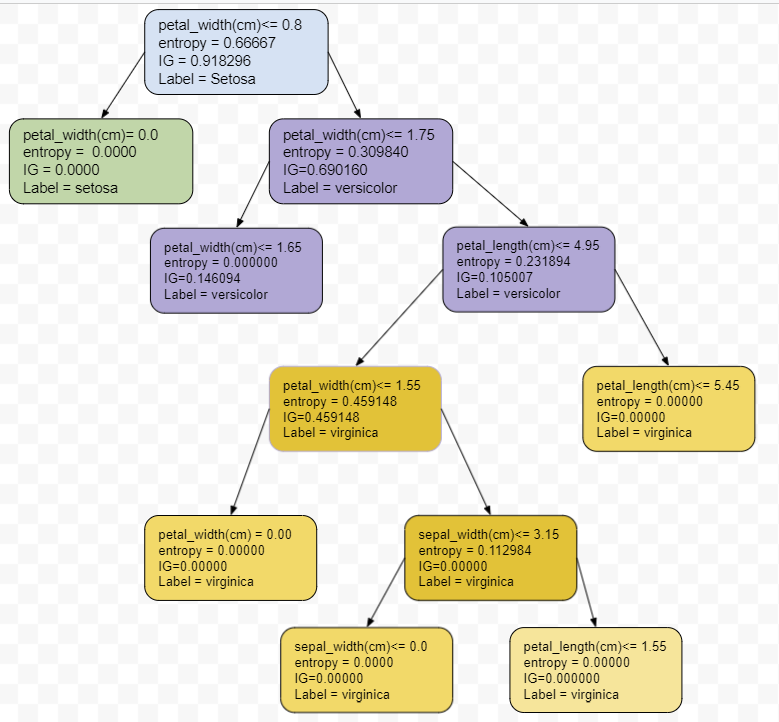

**Test the iris dataset**

In [12]:
# use the test file to test the ID3 Tree
fea1 = X_test
tar1 = y_test
ID3tree(fea1, tar1, 1)

build tree node id 1, index 3, point 1.650000, entropy 0.594646, label 2
build tree node id 2, index 3, point 0.800000, entropy 0.000000, label 1
entropy is too low, entropy :  0.0
build tree node id 3, index 3, point 0.000000, entropy 0.000000, label 2
entropy is too low, entropy :  0


In [13]:
from sklearn import tree
# Create a decision tree classifier
clf = tree.DecisionTreeClassifier(criterion="entropy")
# train the decision tree
clf.fit(X=X_train, y=y_train)

# check feature weight and show accuracy
print("feature weight : ", clf.feature_importances_)
print("decision tree accuracy is : ", clf.score(X=X_test, y=y_test))

feature weight :  [0.         0.02923676 0.85735334 0.1134099 ]
decision tree accuracy is :  0.9777777777777777


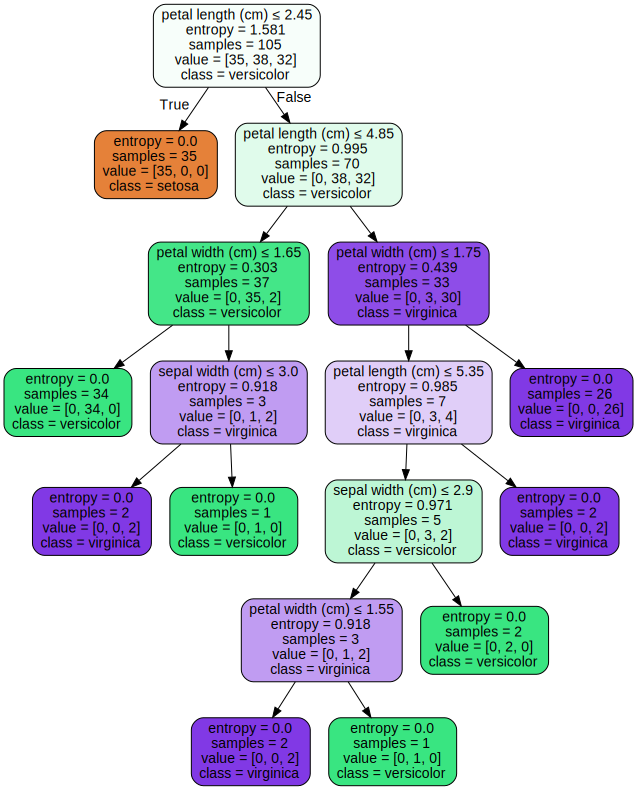

In [14]:
import graphviz
# use graphviz to visualize the decision tree
dot_data = tree.export_graphviz(
    clf,out_file=None,feature_names= feature_names, class_names = class_names, filled=True,rounded=True,special_characters=True)

graph = graphviz.Source(dot_data)
graph